In [2]:
import pandas  as pd
import os
import matplotlib.pyplot as plt
import folium	# 地图可视化
from folium.plugins import HeatMap
import datetime	
%matplotlib inline

In [3]:
# 读取csv文件路径
def get_path(path):
    # path = r'E:\Data\baywheels_2022\\'
    dirlist = os.listdir(path)
    dirlist_new = []
    for i in range(len(dirlist)):
        if dirlist[i].split('.')[-1] == 'csv':     
            if os.path.exists(path + dirlist[i]):
                dirlist_new.append(path + dirlist[i])
    return dirlist_new

In [4]:
# 将CSV文件数据进行合并
def concat_csv(path):
    csv_list = get_path(path)
    df = pd.DataFrame()
    for csv_i in csv_list:
        df_i = pd.read_csv(csv_i)
        df = pd.concat([df,df_i]) # 'Bay_Wheels_2022.csv'
    return df

In [5]:
path = r'E:\Data\baywheels_2022\\' 
# df = concat_csv(path)
# df.to_csv(path+'Bay_Wheels_2022.csv',encoding='utf-8')  # 输出为文件

In [6]:
df_bay = pd.read_csv(path+'Bay_Wheels_2022.csv')
df_bay

,Unnamed: 0,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,0,0DD008BC62836D27,classic_bike,2022-01-13 19:12:23,2022-01-13 19:22:13,Washington St at Van Ness Ave,SF-E22,Natoma St at New Montgomery St,SF-G28-2,37.792980,-122.423302,37.786456,-122.399749,member
1,1,BE9F5C77F1BE0FBF,classic_bike,2022-01-15 15:58:55,2022-01-15 16:10:03,Washington St at Van Ness Ave,SF-E22,Natoma St at New Montgomery St,SF-G28-2,37.792980,-122.423302,37.786456,-122.399749,member
2,2,F0826402062D5A44,classic_bike,2022-01-07 20:34:47,2022-01-07 20:55:25,17th St at Dolores St,SF-N21,Scott St at Golden Gate Ave,SF-I19,37.763015,-122.426497,37.778999,-122.436861,member
3,3,EE9A8BB189061CFD,classic_bike,2022-01-31 16:38:25,2022-01-31 17:13:05,El Embarcadero at Grand Ave,OK-I9,Ninth St at Heinz Ave,BK-H3,37.808715,-122.249251,37.853907,-122.289698,member
4,4,772A8B545A8525C0,classic_bike,2022-01-28 17:28:22,2022-01-28 17:39:55,17th St at Dolores St,SF-N21,Octavia Blvd at Page St,SF-J22-1,37.763015,-122.426497,37.774018,-122.423809,casual
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2614795,136759,EA9F42657764BD67,classic_bike,2022-12-18 14:15:14,2022-12-18 15:18:51,Green St at Van Ness Ave,SF-C22,Allyne Park (Green St at Gough St),SF-C21,37.797628,-122.423535,37.797249,-122.427457,casual
2614796,136760,1B527530F81F7444,classic_bike,2022-12-18 12:19:57,2022-12-18 12:51:22,Market St at Dolores St,SF-L21,Washington St at Kearny St,SF-D27,37.769244,-122.426964,37.795402,-122.404689,casual
2614797,136761,D1138D7DE3984C2A,classic_bike,2022-12-18 14:15:05,2022-12-18 15:19:08,Green St at Van Ness Ave,SF-C22,Allyne Park (Green St at Gough St),SF-C21,37.797628,-122.423535,37.797249,-122.427457,casual
2614798,136762,298D41D1BBFAEFC4,electric_bike,2022-12-18 02:21:16,2022-12-18 02:27:19,Market St at Dolores St,SF-L21,19th St at Florida St,SF-O25-1,37.769225,-122.426970,37.760447,-122.410807,casual


In [7]:
df_bay.isnull().sum() # 查看是否存在空值

Unnamed: 0                 0
ride_id                    0
rideable_type              0
started_at                 0
ended_at                   0
start_station_name    384498
start_station_id      387199
end_station_name      439866
end_station_id        442601
start_lat                  0
start_lng                  0
end_lat                 2570
end_lng                 2570
member_casual              0
dtype: int64

In [8]:
df_bay.duplicated().sum()  # 查看是否有重复数据

0

In [9]:
# 删除空值
df_bay.dropna(subset = ['start_station_id', 'start_station_name', 'end_station_id', 'end_station_name','end_lat','end_lng'], inplace = True)
df_bay.isnull().sum() # 查看是否存在空值

Unnamed: 0            0
ride_id               0
rideable_type         0
started_at            0
ended_at              0
start_station_name    0
start_station_id      0
end_station_name      0
end_station_id        0
start_lat             0
start_lng             0
end_lat               0
end_lng               0
member_casual         0
dtype: int64

In [10]:
# 查看数据信息
df_bay.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1964619 entries, 0 to 2614799
Data columns (total 14 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Unnamed: 0          int64  
 1   ride_id             object 
 2   rideable_type       object 
 3   started_at          object 
 4   ended_at            object 
 5   start_station_name  object 
 6   start_station_id    object 
 7   end_station_name    object 
 8   end_station_id      object 
 9   start_lat           float64
 10  start_lng           float64
 11  end_lat             float64
 12  end_lng             float64
 13  member_casual       object 
dtypes: float64(4), int64(1), object(9)
memory usage: 224.8+ MB


In [11]:
df_bay['started_at'] = pd.to_datetime(df_bay['started_at'])  # 转为时间类型
df_bay['ended_at'] = pd.to_datetime(df_bay['ended_at'])  # 转为时间类型
df_bay.loc[1,'ride_id']
# for name_ in ['start_station_name','end_station_name','ride_id','start_station_id','end_station_id']:
#     df_bay[name_] = df_bay[name_].astype(str)  # 转为字符串



'BE9F5C77F1BE0FBF'

In [12]:
pd.Timedelta(df_bay.loc[1,'ended_at']-df_bay.loc[1,'started_at']).total_seconds()
df_bay['duringtime'] = df_bay['ended_at']-df_bay['started_at']
df_bay['duringtime']
(df_bay.loc[1,'ended_at']-df_bay.loc[1,'started_at']).total_seconds()

668.0

In [13]:
round(df_bay.describe(),3)

,Unnamed: 0,started_at,ended_at,start_lat,start_lng,end_lat,end_lng,duringtime
count,1964619.000,1964619,1964619,1964619.000,1964619.000,1964619.000,1964619.000,1964619
mean,98615.353,2022-07-07 08:17:28.972030720,2022-07-07 08:32:20.402515456,37.772,-122.392,37.772,-122.391,0 days 00:14:51.430482958
min,0.000,2022-01-01 00:03:19,2022-01-01 00:14:59,37.309,-122.511,0.000,-122.511,-1 days +23:05:47
25%,46084.000,2022-04-20 11:58:14,2022-04-20 12:11:53.500000,37.768,-122.426,37.768,-122.424,0 days 00:05:56
50%,91455.000,2022-07-11 17:45:24,2022-07-11 17:58:10,37.777,-122.411,37.777,-122.409,0 days 00:09:54
75%,141399.000,2022-09-25 10:28:59.500000,2022-09-25 10:44:14.500000,37.790,-122.395,37.790,-122.395,0 days 00:15:51
max,273478.000,2022-12-31 23:59:02,2023-01-01 01:01:43,37.880,-121.864,37.880,0.000,17 days 01:00:05
std,64406.004,NaN,NaN,0.072,0.091,0.081,0.153,0 days 00:55:33.562092469


怎么还有负值，以及17天的值

In [14]:
df_bay[df_bay['duringtime']<pd.Timedelta(0)]  # 异常负值

,Unnamed: 0,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,duringtime
64407,64407,DFD98616CBB51347,classic_bike,2022-01-22 14:52:51,2022-01-22 14:52:50,Haste St at Telegraph Ave,BK-E9-2,Haste St at Telegraph Ave,BK-E9-2,37.866043,-122.258804,37.866043,-122.258804,member,-1 days +23:59:59
111431,111431,D2DDED6AC7F0B99D,electric_bike,2022-01-22 11:32:40,2022-01-22 11:32:39,The Embarcadero at Steuart St,SF-F30-1,The Embarcadero at Steuart St,SF-F30-1,37.791447,-122.390900,37.791401,-122.391038,member,-1 days +23:59:59
190535,39309,51C9C147FAB6311A,electric_bike,2022-02-09 14:02:11,2022-02-09 14:02:10,Koshland Park,SF-K21,Koshland Park,SF-K21,37.773450,-122.427207,37.773414,-122.427317,member,-1 days +23:59:59
1096926,116657,DB7BDD2E7795DF98,electric_bike,2022-06-13 17:55:23,2022-06-13 17:53:50,Market St at Steuart St,SF-E29-2,Market St at Steuart St,SF-E29-2,37.794502,-122.394914,37.794525,-122.394880,member,-1 days +23:58:27
2000557,255675,73B088C7D4B026FA,electric_bike,2022-09-24 09:25:26,2022-09-24 09:24:51,Post St at Kearny St,SF-F27,Post St at Kearny St,SF-F27,37.788786,-122.403441,37.788975,-122.403452,casual,-1 days +23:59:25
2000558,255676,DAE980F4E77BAA52,electric_bike,2022-09-24 09:25:16,2022-09-24 09:21:16,Post St at Kearny St,SF-F27,Post St at Kearny St,SF-F27,37.789022,-122.403686,37.788975,-122.403452,casual,-1 days +23:56:00
2114568,96207,8F23ADB22CCA465B,classic_bike,2022-10-31 15:13:21,2022-10-31 15:13:17,Lincoln Blvd at Graham St,SF-B14,Lincoln Blvd at Graham St,SF-B14,37.801750,-122.456363,37.801750,-122.456363,member,-1 days +23:59:56
2300479,16355,8A85E4D41269EF2A,classic_bike,2022-11-25 10:11:04,2022-11-25 10:10:46,Valencia St at 16th St,SF-M22-2,Valencia St at 16th St,SF-M22-2,37.765429,-122.421890,37.765429,-122.421890,member,-1 days +23:59:42
2309411,25287,CF1DFF227E2C0BD3,electric_bike,2022-11-06 01:57:11,2022-11-06 01:09:25,Market St at Franklin St,SF-K22-1,Eureka Valley Recreation Center,SF-O18,37.773891,-122.420832,37.759211,-122.436797,member,-1 days +23:12:14
2329981,45857,D8A562B50F9D19F8,classic_bike,2022-11-06 01:53:20,2022-11-06 01:10:55,MLK Jr Way at University Ave,BK-C6,North Berkeley BART Station,BK-C5,37.871719,-122.273068,37.873558,-122.283093,casual,-1 days +23:17:35


In [15]:
num = int(len(df_bay)*0.99)  # 计算总列数的99%
df_bay['duringtime'].sort_values(ascending=True).iloc[:num].tail(20) # 将用时进行升序排序，查看前99%的数据的最后20个值

379792    0 days 01:23:14
396990    0 days 01:23:14
1494026   0 days 01:23:14
911387    0 days 01:23:14
158073    0 days 01:23:14
1077416   0 days 01:23:15
855513    0 days 01:23:15
845518    0 days 01:23:15
1691301   0 days 01:23:15
1776180   0 days 01:23:15
573892    0 days 01:23:15
1304574   0 days 01:23:15
693537    0 days 01:23:16
2268346   0 days 01:23:16
1334315   0 days 01:23:16
1975803   0 days 01:23:16
1557511   0 days 01:23:16
349892    0 days 01:23:16
526936    0 days 01:23:16
2352914   0 days 01:23:16
Name: duringtime, dtype: timedelta64[ns]

In [16]:
df_bay[df_bay['duringtime']>pd.Timedelta(hours=2)]  # 根据实际共享单车骑行时间判断，2小时以下为正常骑行的标准，对2小时以上的骑行数据判定为异常数据。将其视为异常值或者

,Unnamed: 0,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,duringtime
309,309,7CDEF17C5A942328,docked_bike,2022-01-09 16:39:34,2022-01-13 15:02:45,El Embarcadero at Grand Ave,OK-I9,Lakeside Dr at 14th St,OK-L7-2,37.808715,-122.249251,37.801319,-122.262642,casual,3 days 22:23:11
584,584,CCF042A0A0C56C85,docked_bike,2022-01-29 09:45:00,2022-01-29 18:43:46,30th St at San Jose Ave,SF-T21,Myrtle St at Polk St,SF-G23,37.742314,-122.423181,37.785479,-122.419342,casual,0 days 08:58:46
732,732,006BF5CD9EDE3550,classic_bike,2022-01-05 00:36:12,2022-01-05 02:47:10,Franklin Square,SF-N25,Valencia St at 16th St,SF-M22-2,37.764544,-122.410349,37.765429,-122.421890,member,0 days 02:10:58
1013,1013,9325967C3AE33A82,classic_bike,2022-01-23 15:10:20,2022-01-24 09:17:38,Chestnut St at Van Ness Ave,SF-B22,Terry Francois Blvd at Mission Bay Blvd N,SF-L31-1,37.802300,-122.424413,37.771767,-122.386689,casual,0 days 18:07:18
1198,1198,CFFCEF7D22EBBAB1,docked_bike,2022-01-28 04:46:00,2022-01-28 07:40:59,Steiner St at California St,SF-F19,Golden Gate Ave at Franklin St,SF-I22,37.788569,-122.435401,37.780819,-122.421788,casual,0 days 02:54:59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2614319,136283,57CC3488BE9F1035,electric_bike,2022-12-02 13:22:05,2022-12-02 15:46:38,Powell St at Columbus Ave,SF-C25,Buchanan St at North Point St,SF-A20,37.800312,-122.410842,37.804432,-122.433523,casual,0 days 02:24:33
2614342,136306,4747CA62EC057FF6,classic_bike,2022-12-30 16:45:10,2022-12-30 19:07:09,Newbury Park Dr at King Rd,SJ-H17,Berryessa BART Station (Mabury Rd at Lenfest Rd),SJ-H16,37.365536,-121.867966,37.365088,-121.871612,member,0 days 02:21:59
2614426,136390,4657A7D9BDAADF0E,classic_bike,2022-12-24 10:24:03,2022-12-24 12:33:22,North Point St at Grant Ave,SF-A26,Fillmore St at Jefferson St,SF-A19,37.807171,-122.409279,37.805376,-122.437261,casual,0 days 02:09:19
2614427,136391,E9D53127B1478036,classic_bike,2022-12-24 10:22:36,2022-12-24 12:34:01,North Point St at Grant Ave,SF-A26,Fillmore St at Jefferson St,SF-A19,37.807171,-122.409279,37.805376,-122.437261,casual,0 days 02:11:25


In [17]:
# 剔除无效值
df_bay = df_bay[df_bay['duringtime'] < pd.Timedelta(hours=2)]
df_bay = df_bay[df_bay['duringtime'] > pd.Timedelta(0)]

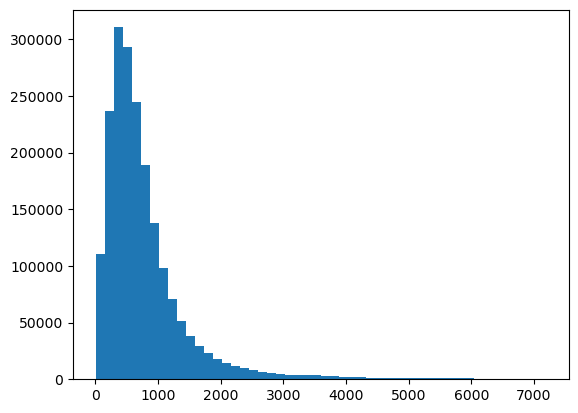

In [18]:
# 查看持续时间的分布情况
plt.hist(df_bay['duringtime'].dt.total_seconds(), bins = 50)  # pd.Series.dt属性 histogam直方图
plt.show() 

In [19]:
pd.Series.dt?

Init signature: pd.Series.dt(data: 'Series')
Docstring:     
Accessor object for datetimelike properties of the Series values.

Examples
--------
>>> seconds_series = pd.Series(pd.date_range("2000-01-01", periods=3, freq="s"))
>>> seconds_series
0   2000-01-01 00:00:00
1   2000-01-01 00:00:01
2   2000-01-01 00:00:02
dtype: datetime64[ns]
>>> seconds_series.dt.second
0    0
1    1
2    2
dtype: int32

>>> hours_series = pd.Series(pd.date_range("2000-01-01", periods=3, freq="h"))
>>> hours_series
0   2000-01-01 00:00:00
1   2000-01-01 01:00:00
2   2000-01-01 02:00:00
dtype: datetime64[ns]
>>> hours_series.dt.hour
0    0
1    1
2    2
dtype: int32

>>> quarters_series = pd.Series(pd.date_range("2000-01-01", periods=3, freq="q"))
>>> quarters_series
0   2000-03-31
1   2000-06-30
2   2000-09-30
dtype: datetime64[ns]
>>> quarters_series.dt.quarter
0    1
1    2
2    3
dtype: int32

Returns a Series indexed like the original Series.
Raises TypeError if the Series does not contain datetimelike

In [20]:
# 分析用户骑行的时间段
df_bay['hour'] = df_bay['started_at'].dt.hour
df_bay['day_of_week'] = df_bay['started_at'].dt.day_of_week
df_bay['month'] = df_bay['started_at'].dt.month


,day_of_week,ride_id
0,0,256196
1,1,287438
2,2,299773
3,3,293545
4,4,296717
5,5,279356
6,6,241712


In [21]:
df_h = df_bay.groupby(by = ['hour'],as_index = False).agg({'duringtime':'sum'})
df_h['duringtime'] = df_h['duringtime'].dt.total_seconds()

df_w = df_bay.groupby(by = ['day_of_week'],as_index = False).agg({'duringtime':'sum'})
df_w['duringtime'] = df_w['duringtime'].dt.total_seconds()

df_m = df_bay.groupby(by = ['month'],as_index = False).agg({'duringtime':'sum'})
df_m['duringtime'] = df_m['duringtime'].dt.total_seconds()

f = df_bay.groupby(by=['day_of_week'],as_index = False).agg({'ride_id':'count'})

,day_of_week,duringtime
0,0,191999448.0
1,1,205041075.0
2,2,214357593.0
3,3,211823142.0
4,4,229195094.0
5,5,255322284.0
6,6,221936798.0


Text(0.5, 1.0, 'hour')

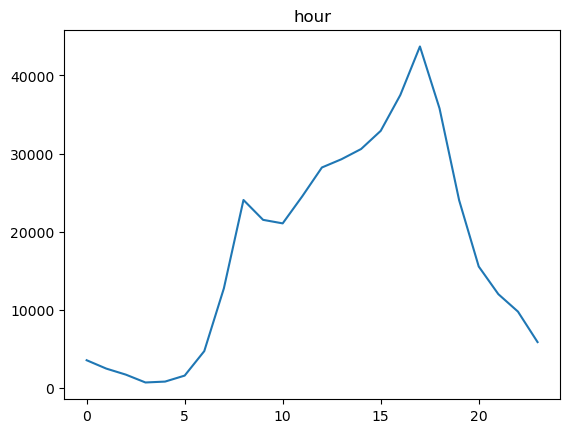

In [22]:

plt.plot(df_h['hour'],df_h['duringtime']/3600)
plt.title('hour')

Text(0.5, 1.0, 'month')

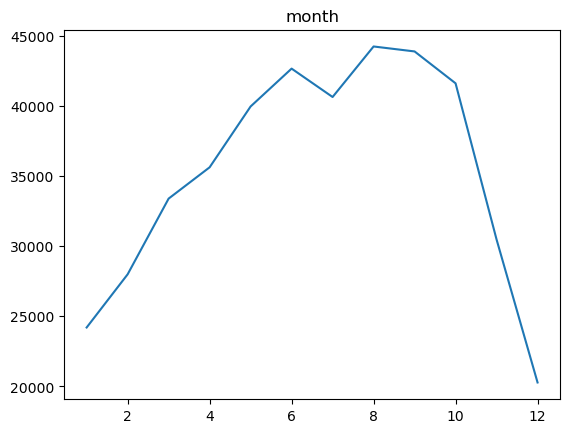

In [23]:
plt.plot(df_m['month'],df_m['duringtime']/3600)
plt.title('month')

Text(0.5, 1.0, 'day_of_week')

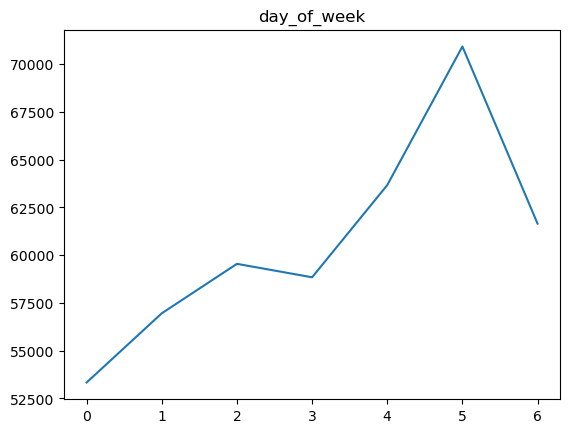

In [24]:
plt.plot(df_w['day_of_week'],df_w['duringtime']/3600)
plt.title('day_of_week')

Text(0.5, 1.0, 'day_of_week')

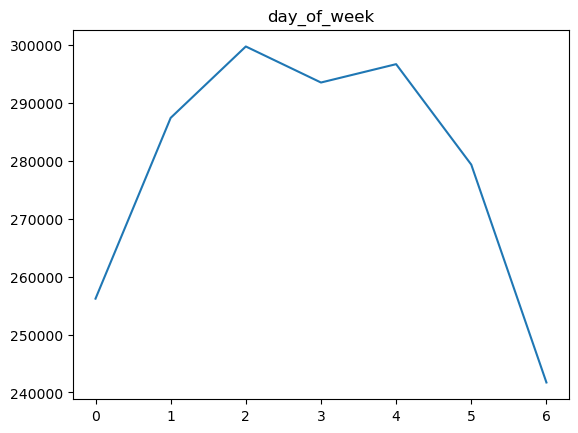

In [26]:
plt.plot(f['day_of_week'],f['ride_id'])
plt.title('day_of_week')